In [0]:
import os
import matplotlib.pyplot as plt
import random
import shutil
import time
import zipfile
import tensorflow as tf
from matplotlib.pyplot import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Create temporary folder for dataset
#kaggle datasets download -d jordiviader/american-sign-language-alphabet-static \
#-O /tmp/DataSet_Signos.zip

local_zip = '/content/gdrive/My Drive/Dataset/434893_825879_bundle_archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()  

In [0]:
# For Splitting in Colab (Online Computing)
data_dir  = '/tmp/DataSet Signos'
train_dir = os.path.join(data_dir,'train')
val_dir   = os.path.join(data_dir,'validation')
label = dict()                                 # Original Dataset Label
count = 0                                      # Constant
Label = dict()                                 # Splitting Dataset Label
Count = dict()                                 # Number of Split Data
train_size,val_size = 0.7,0.3                  # Portion of Split (0-1)

# EXTRACT RAW INFORMATION 
if train_size+val_size > 1.0:
        raise Exception('Cummulative data split portion out of maximum range (>1)')
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        sub_dir = os.path.join(data_dir,DIR)
        number = len(os.listdir(sub_dir))
        label[DIR] = number
        print(f'Number of images in directory {DIR} is {number}')
        count += number
        
# GENERATE DIRECTORIES FOR DATASET
if os.path.isdir(train_dir):
    shutil.rmtree(train_dir)
    os.mkdir(train_dir)
    print('\nTraining directory has been recreated')
else:
    os.mkdir(train_dir)
    print('\nTraining directory has been created')
if os.path.isdir(val_dir):
    shutil.rmtree(val_dir)
    os.mkdir(val_dir)
    print('Validation directory has been recreated')
else:
    os.mkdir(val_dir)
    print('Validation directory has been created')

# GENERATE SUBDIRECTORIES FOR DATASET
for i in list(label.keys()):
    new_dir_train = os.path.join(train_dir,i)
    new_dir_val = os.path.join(val_dir,i)
    try:
        os.mkdir(new_dir_train)
        os.mkdir(new_dir_val)
    except:
        print(f'\nSubdirectories has been created before\n')
        
# SHUFFLE-SPLIT AND COPY DATASET INTO DIRECTORIES
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        link = os.path.join(data_dir,DIR)
        dataset = os.listdir(link)
        random.shuffle(dataset)
        num = label[DIR]
        train_length,val_length = int(train_size*num),int(val_size*num)
        train_directory = os.path.join(train_dir,DIR)
        val_directory = os.path.join(val_dir,DIR)
        train,val = dataset[:train_length],dataset[train_length:] 
        for i in train:
            source_train = os.path.join(link,i)
            destination_train = os.path.join(train_directory,i)
            shutil.copyfile(source_train,destination_train)
        for j in val:
            source_val = os.path.join(link,j)
            destination_val = os.path.join(val_directory,j)
            shutil.copyfile(source_val,destination_val)
for DIR in os.listdir(data_dir):
    if len(DIR)>1:
        c = 0
        directory = os.path.join(data_dir,DIR)
        for subdir in os.listdir(directory):
            sub_dir = os.path.join(directory,subdir)
            number = len(os.listdir(sub_dir))
            Label[DIR+'_'+subdir] = number
            c += number
        Count[DIR] = c
train_len,val_len = Count['train'],Count['validation']
print(f'\nLabel of original data :\n{list(label.keys())}\n')
print(f'Total images in original dataset         : {count}\n')
print(f'Total dataset after and before split     : {sum(Count.values()),count}\n')
print(f'Total numbers of training and validation : {train_len,val_len}')

Number of images in directory N is 67
Number of images in directory G is 85
Number of images in directory C is 131
Number of images in directory H is 71
Number of images in directory K is 74
Number of images in directory M is 71
Number of images in directory L is 72
Number of images in directory D is 73
Number of images in directory F is 84
Number of images in directory U is 57
Number of images in directory V is 57
Number of images in directory A is 63
Number of images in directory Q is 69
Number of images in directory O is 85
Number of images in directory P is 86
Number of images in directory I is 74
Number of images in directory X is 51
Number of images in directory T is 56
Number of images in directory E is 155
Number of images in directory R is 65
Number of images in directory W is 54
Number of images in directory B is 78
Number of images in directory S is 52
Number of images in directory Y is 58

Training directory has been recreated
Validation directory has been recreated

Label 

In [0]:
# CASE : The dataset in the same directory as the notebook in LOCAL COMPUTER (NOT ONLINE)
data_dir = os.getcwd()+'\\DataSet Signos'      # Main Directory
train_dir = os.path.join(data_dir,'train')     # Training Directory
val_dir = os.path.join(data_dir,'validation')  # Validation Directory
test_dir = os.path.join(data_dir,'test')       # Testing Directory
label = dict()                                 # Original Dataset Label
count = 0                                      # Constant
Label = dict()                                 # Splitting Dataset Label
Count = dict()                                 # Number of Split Data
train_size,val_size,test_size = 0.7,0.3,0    # Portion of Split (0-1)

# EXTRACT RAW INFORMATION 
if train_size+test_size+val_size > 1.0 or train_size+test_size+val_size > 1 :
        raise Exception('Cummulative data split portion out of maximum range (>1)')
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        sub_dir = os.path.join(data_dir,DIR)
        number = len(os.listdir(sub_dir))
        label[DIR] = number
        print(f'Number of images in directory {DIR} is {number}')
        count += number

# GENERATE DIRECTORIES FOR DATASET
if os.path.isdir(train_dir):
    shutil.rmtree(train_dir)
    os.mkdir(train_dir)
    print('\nTraining directory has been recreated')
else:
    os.mkdir(train_dir)
    print('\nTraining directory has been created')
if os.path.isdir(val_dir):
    shutil.rmtree(val_dir)
    os.mkdir(val_dir)
    print('Validation directory has been recreated')
else:
    os.mkdir(val_dir)
    print('Validation directory has been created')
if os.path.isdir(test_dir):
    shutil.rmtree(test_dir)
    os.mkdir(test_dir)
    print('Testing directory has been recreated')
else:
    os.mkdir(test_dir)
    print('Testing directory has been created')

# GENERATE SUBDIRECTORIES FOR DATASET
for i in list(label.keys()):
    new_dir_train = os.path.join(train_dir,i)
    new_dir_test = os.path.join(test_dir,i)
    new_dir_val = os.path.join(val_dir,i)
    try:
        os.mkdir(new_dir_train)
        os.mkdir(new_dir_test)
        os.mkdir(new_dir_val)
    except:
        print(f'\nSubdirectories has been created before\n')

# SHUFFLE-SPLIT AND COPY DATASET INTO DIRECTORIES
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        link = os.path.join(data_dir,DIR)
        dataset = os.listdir(link)
        random.shuffle(dataset)
        num = label[DIR]
        train_length,val_length = int(train_size*num),int(val_size*num)
        train_directory = os.path.join(train_dir,DIR)
        val_directory = os.path.join(val_dir,DIR)
        test_directory = os.path.join(test_dir,DIR)
        if test_size != 0:
            train,val,test = dataset[:train_length],dataset[train_length:(val_length+train_length)],dataset[(val_length+train_length):] 
            if len(test)!=0 or len(test) == None:
                for k in test:
                    source_test = os.path.join(link,k)
                    destination_test = os.path.join(test_directory,k)
                    shutil.copyfile(source_test,destination_test)
        else:
            train,val = dataset[:train_length],dataset[train_length:] 
        for i in train:
            source_train = os.path.join(link,i)
            destination_train = os.path.join(train_directory,i)
            shutil.copyfile(source_train,destination_train)
        for j in val:
            source_val = os.path.join(link,j)
            destination_val = os.path.join(val_directory,j)
            shutil.copyfile(source_val,destination_val)
for DIR in os.listdir(data_dir):
    if len(DIR) > 1:
        c = 0
        directory = os.path.join(data_dir,DIR)
        for subdir in os.listdir(directory):
            sub_dir = os.path.join(directory,subdir)
            number = len(os.listdir(sub_dir))
            Label[DIR+'_'+subdir] = number
            c += number
        Count[DIR] = c
train_len,test_len,val_len = Count['train'],Count['test'],Count['validation']
print(f'\nLabel of original data :\n{list(label.keys())}\n')
print(f'Total images in original dataset                    : {count}\n')
print(f'Total dataset after and before split                : {sum(Count.values()),count}\n')
print(f'Total numbers of training, validation, testing data : {train_len,val_len,test_len}')

FileNotFoundError: ignored

Dataset in folder /tmp/DataSet Signos/validation/O

Pixel min and max : (0, 255)
Shape of Image Data in the folder



{'O_IMG_1195.JPG': (480, 720, 3),
 'O_IMG_1197.JPG': (480, 720, 3),
 'O_IMG_1207.JPG': (480, 720, 3),
 'O_IMG_1212.JPG': (480, 720, 3),
 'O_IMG_1222.JPG': (480, 720, 3),
 'O_IMG_1225.JPG': (480, 720, 3),
 'O_IMG_1228.JPG': (480, 720, 3),
 'O_IMG_1230.JPG': (480, 720, 3),
 'O_IMG_1233.JPG': (480, 720, 3),
 'O_IMG_1236.JPG': (480, 720, 3),
 'O_IMG_1247.JPG': (480, 720, 3),
 'O_IMG_1257.JPG': (480, 720, 3),
 'O_IMG_1260.JPG': (480, 720, 3),
 'O_IMG_1261.JPG': (480, 720, 3),
 'O_IMG_1263.JPG': (480, 720, 3),
 'O_IMG_1265.JPG': (480, 720, 3),
 'O_IMG_1268.JPG': (480, 720, 3),
 'O_IMG_1270.JPG': (480, 720, 3),
 'O_IMG_1272.JPG': (480, 720, 3),
 'O_IMG_1277.JPG': (480, 720, 3)}

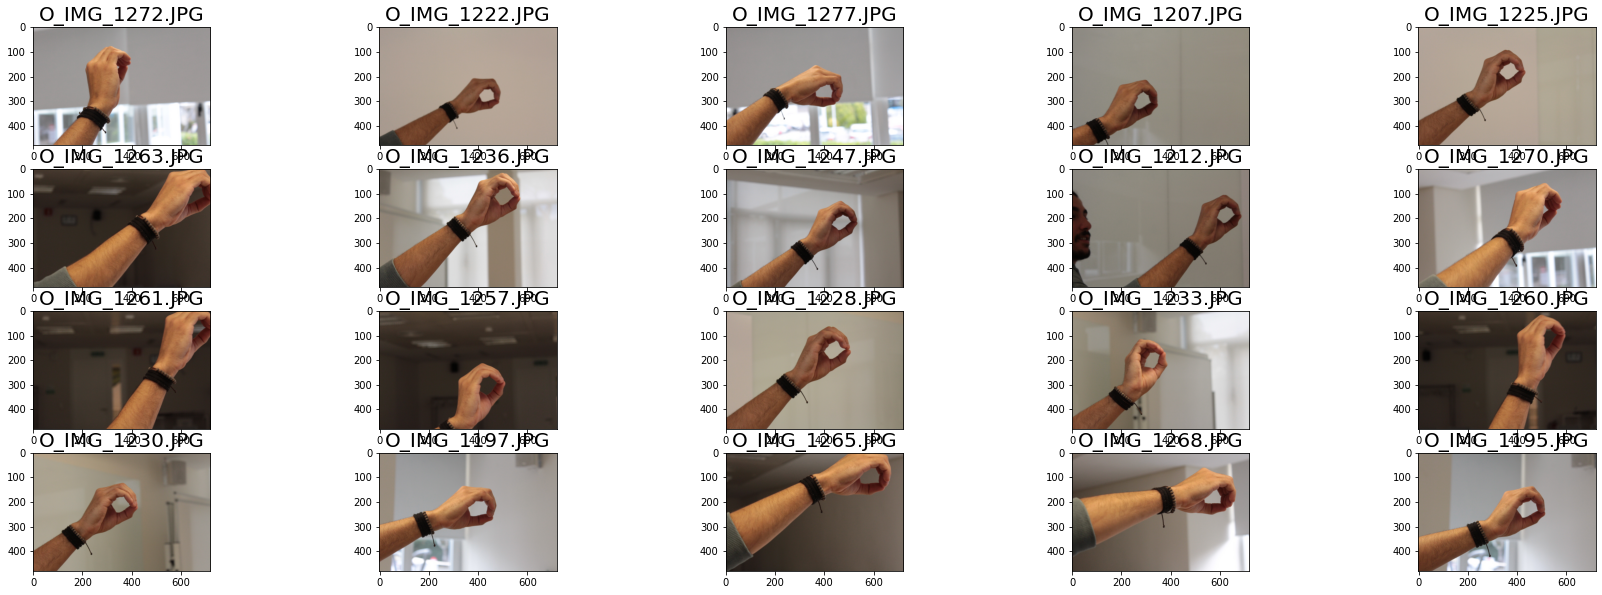

In [0]:
%matplotlib inline
dir_link  = val_dir                              # Link of directory for plotting
dir_label = 'O'                                  # Spesific label for directory
images    = 20                                   # Numbers of images plot
row       = 4                                    # Axes row setting
link      = os.path.join(dir_link,dir_label)     # Full link of images
shape     = dict()                               # Shape of images
fig,ax = plt.subplots(figsize=(30,10),nrows=row,ncols=images//row)
min_pixel = 0
max_pixel = 0
print(f'Dataset in folder {link}\n')
for i in range(images):
    if images > len(os.listdir(link)):
        raise Exception('Data in directory is out of number of plot')
    else:
        img_train    = imread(os.path.join(link,os.listdir(link)[i]))
        if img_train.min() <= min_pixel:
            min_pixel  = img_train.min()
        if img_train.max() > max_pixel:
            max_pixel = img_train.max()
        title = dir_label+'_'+os.listdir(link)[i]
        shape[title] = img_train.shape
        try:
            ax[i%row,i//row].imshow(img_train)
            ax[i%row,i//row].set_title(title,fontsize=20)
        except:
            pass
print(f'Pixel min and max : {min_pixel,max_pixel}')
print('Shape of Image Data in the folder\n')
shape

In [0]:
# DEFINING EARLYSTOPPING
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.perf_counter()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.perf_counter() - self.epoch_time_start)
        
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True

time_callback = TimeHistory()
loss_callback = LossCallback()

# DEFINING IMAGEDATAGENERATOR
TRAINING_DIR   = train_dir
VALIDATION_DIR = val_dir
input_shape    = list(shape.values())[0]
num_classes    = len(label)

training_datagen = ImageDataGenerator(
    rescale = 1./max_pixel,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./max_pixel,
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=input_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=input_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 1238 images belonging to 24 classes.
Found 550 images belonging to 24 classes.


In [0]:
# Use this ONLY if want to USE TF.HUB Model and the model is not AVAILABLE yet.
!pip install tensorflow_hub
import tensorflow_hub as hub
model_url = "https://tfhub.dev/google/imagenet/inception_v3/classification/4"
model_transfer = hub.KerasLayer(model_url, input_shape=input_shape) 
model_transfer.trainable = False
model     = tf.keras.Sequential([
    model_transfer,
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.compile(loss = 'categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [0]:
# SETTING LAYER FROM TRANSFER MODEL

#local_weights_file = os.path.join(os.getcwd(),'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = input_shape, 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

--2020-06-11 06:26:20--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   111MB/s    in 0.8s    

2020-06-11 06:26:22 (111 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 720, 3) 0                                 

In [0]:
last_layer = pre_trained_model.get_layer('mixed6')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 28, 43, 768)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)           
model = Model( pre_trained_model.input, x) 
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [0]:
# Use this for simple model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    #-----
    # The second convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #-----
    # The third convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #-----
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #-----
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


#model.summary()

model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

ResourceExhaustedError: ignored

In [0]:
history = model.fit(train_generator, 
                    epochs=1000, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3,
                    callbacks=[time_callback, loss_callback])

Epoch 1/1000
20/20 [==============================] - 50s 2s/step - loss: 85.4154 - accuracy: 0.0437 - val_loss: 3.1939 - val_accuracy: 0.0312
Epoch 2/1000
20/20 [==============================] - 52s 3s/step - loss: 3.1727 - accuracy: 0.0500 - val_loss: 3.1776 - val_accuracy: 0.0312
Epoch 3/1000
20/20 [==============================] - 53s 3s/step - loss: 3.1840 - accuracy: 0.0540 - val_loss: 3.1822 - val_accuracy: 0.0521
Epoch 4/1000
20/20 [==============================] - 51s 3s/step - loss: 3.1802 - accuracy: 0.0429 - val_loss: 3.1760 - val_accuracy: 0.0729
Epoch 5/1000
20/20 [==============================] - 50s 2s/step - loss: 3.1879 - accuracy: 0.0714 - val_loss: 3.1742 - val_accuracy: 0.0729
Epoch 6/1000
20/20 [==============================] - 52s 3s/step - loss: 3.1728 - accuracy: 0.0797 - val_loss: 3.1708 - val_accuracy: 0.0938
Epoch 7/1000
20/20 [==============================] - 51s 3s/step - loss: 3.1815 - accuracy: 0.0810 - val_loss: 3.1731 - val_accuracy: 0.0833
Epoch

KeyboardInterrupt: ignored

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.show();

In [0]:
model.save('mod_incept_v3.h5')

# FULL DATA TRAINING

In [0]:
# DEFINING EARLYSTOPPING
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.perf_counter()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.perf_counter() - self.epoch_time_start)
        
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True

time_callback = TimeHistory()
loss_callback = LossCallback()

# DEFINING IMAGEDATAGENERATOR
TRAINING_DIR   = train_dir
input_shape    = list(shape.values())[0]
num_classes    = len(label)

training_datagen = ImageDataGenerator(
    rescale = 1./max_pixel,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=input_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

In [0]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = input_shape, 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed4')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)           
model_full = Model( pre_trained_model.input, x) 
model_full.compile(
    loss = 'categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [0]:
history_full = model_full.fit(train_generator, 
                    epochs=1000, 
                    steps_per_epoch=20,  
                    verbose = 1, 
                    callbacks=[time_callback, loss_callback])

In [0]:
acc = history_full.history['accuracy']
loss = history_full.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Full Data Training accuracy')
plt.legend(loc=0)

plt.show();

In [0]:
model.save('mod_incept_v3_full.h5')